In [1]:
using Plots

In [2]:
function logistic_gillespie(µ, ν, C, n_0, n_steps=10000)
    """
    Parameters
    ----------
    µ: birth rate
    ν: death rate
    C: capacity
    n_0: initial population size
    n_steps: number of iterations
    
    when n -> ∞, the resulting differential equation is:
    dn/dt = µn + ν(1 + n/C)n

    Returns
    --------
    event_time: list of times when an event (i.e birth or death) occurs
    n: the population size at each timepoint in event_time
    """
    
    n = [0. for _ in 1:n_steps]
    event_time = [0. for _ in 1:n_steps]
    n[1] = n_0
    
    for i in 2:n_steps
        if n[i-1] == 0 # If the population is extinct, the simulation stops.
            n = n[1:(i-1)]
            event_time = event_time[1:(i-1)]
            break
        end
        birth_rate = µ * n[i-1]
        death_rate = ν * (1 + n[i-1] / C) * n[i-1]

        t = -log(rand()) / (birth_rate + death_rate) # time until next event

        is_birth = rand() < (birth_rate / (birth_rate + death_rate)) # whether the next event is birth 

        n[i] = n[i-1] + ifelse(is_birth, 1, -1)
        event_time[i] = event_time[i-1] + t
    end
    event_time, n
end

logistic_gillespie (generic function with 2 methods)

In [3]:
list_n = []
list_event_time = []
µ, ν, C, n_0 = 1.5, 1, 100, 20
for i in 1:3
    event_time, n　= logistic_gillespie(µ, ν, C, n_0)
    push!(list_n, n)
    push!(list_event_time, event_time)
end

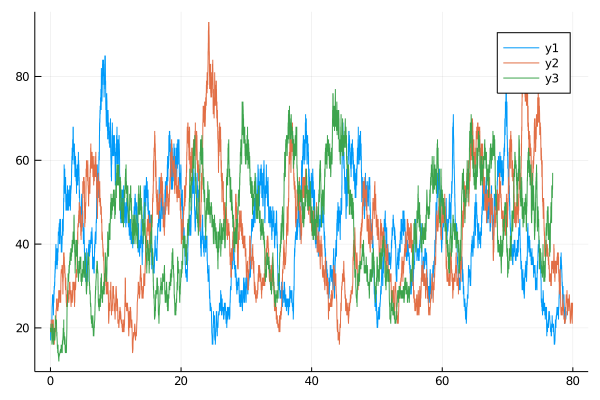

In [6]:
p = plot(list_event_time, list_n)

In [8]:
savefig(p, "images/gillepie-trajectories.png")